# Multiple Linear Regression with Ethereum Stock Price

In [1]:
import pandas as pd

# Loads the 'Ethereum_Price_History_USD.csv' file as a DataFrame, using the 
# 'SNo' as the index column as the 
Eth_Price_Data = pd.read_csv('Ethereum_Price_History_USD.csv', index_col='SNo')

# Show us the first 5 Rows in the 'eth_price_data' DataFrame
Eth_Price_Data.head()

,Date,Price,Open,High,Low,Vol.,Change %
SNo,,,,,,,
1,2016-03-10,11.75,11.20,11.85,11.07,0.0,4.91
2,2016-03-11,11.95,11.75,11.95,11.75,180.0,1.70
3,2016-03-12,12.92,11.95,13.45,11.95,830.0,8.12
4,2016-03-13,15.07,12.92,15.07,12.92,1300.0,16.64
5,2016-03-14,12.50,15.07,15.07,11.40,92180.0,-17.05


In [2]:
print('Number of the days of Ethereum prices contained in the dataset: ', len(Eth_Price_Data['Date']), 'days' )

Number of the days of Ethereum prices contained in the dataset:  1994 days


## Plotting the dataset

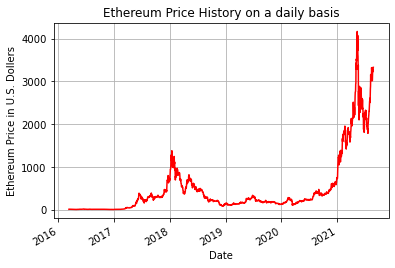

In [5]:
from matplotlib import pyplot as plt


# Creates a new DataFrame for plotting the Ethereum price history purposes 
# only containing only the 'Date' and 'Price' Variables as it doesn't
# affect the original dataset
Plot_Eth_Price = pd.DataFrame(Eth_Price_Data, columns = ['Date', 'Price'])

# Creates a Variable 'Plot_Eth_Date' which contains the 'Date' variable only
# We do this to edit the dates without changing the rest of the dataset
Plot_Eth_Date = Plot_Eth_Price['Date']

# Converts the content in the 'Date' variable to datetime
# This is needed to 
Plot_Eth_Date = pd.to_datetime(Plot_Eth_Date)

plt.figure('Ethereum Price History')
plt.title('Ethereum Price History on a daily basis')
plt.xlabel('Date')
plt.ylabel('Ethereum Price in U.S. Dollers')
plt.grid(True)
plt.plot(Plot_Eth_Date, Plot_Eth_Price['Price'], color = 'red')
plt.gcf().autofmt_xdate()
plt.savefig('Ethereum_Price_History.png')

plt.show()